In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
tf.config.set_visible_devices([], 'GPU')

In [3]:
_, (images, _) = tf.keras.datasets.cifar10.load_data()

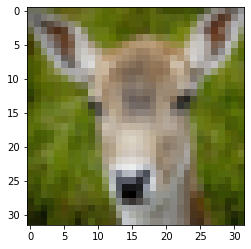

In [10]:
idx = np.random.randint(images.shape[0])
sample = images[idx:idx + 1].astype(np.float32) / 255
plt.imshow(sample[0])

In [11]:
def generate_gaussian(kernel_size, sigma):
    """Generate gaussian filter.
    Args:
        kernel_size: int, size of the kernel.
        sigma: float, standard deviation.
    Returns:
        np.ndarray, [kernel_size, kernel_size], gaussian kernel.
    """
    # [kernel_size]
    pos = np.arange(kernel_size) - kernel_size // 2
    exp = np.exp(-pos ** 2 / (2 * sigma ** 2))
    # [kernel_size, kernel_size]
    kernel = 1 / (2 * np.pi * sigma ** 2) * exp[:, None] * exp[None]
    normalized = kernel / kernel.sum()
    return normalized.astype(np.float32)

In [12]:
def wrap(kernel, dim=3):
    """Wrap flat kernel to depthwise kernel.
    Args:
        kernel: np.ndarray, [K, K], flat kernel.
    Returns:
        np.ndarray, [K, K, dim, dim], depthwise kernel.
    """
    newone = np.zeros(list(kernel.shape) + [dim, dim])
    for i in range(dim):
        newone[..., i, i] = kernel
    return newone

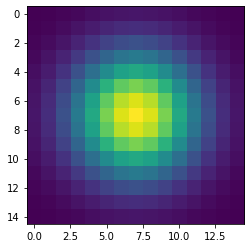

In [13]:
plt.imshow(generate_gaussian(15, 3))

In [14]:
sigma = [1, 3, 5]
kernel_size = [3, 7, 15]

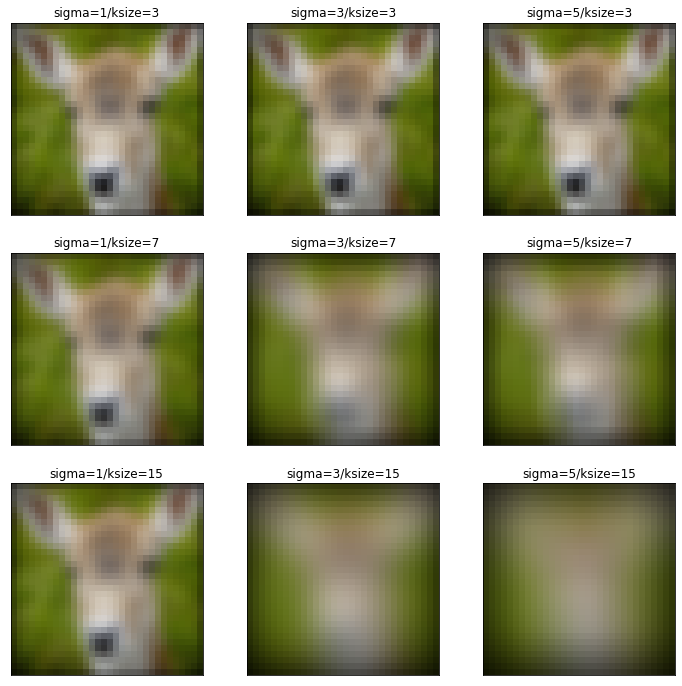

In [16]:
i = 0
plt.figure(figsize=(12, 12))
for k in kernel_size:
    for s in sigma:
        i += 1
        plt.subplot(len(kernel_size), len(sigma), i)
        # [k, k]
        kernel = generate_gaussian(k, s)
        # [1, H, W, C]
        conv = tf.nn.conv2d(sample, wrap(kernel), strides=1, padding='SAME')

        plt.title(f'sigma={s}/ksize={k}')
        plt.imshow(conv.numpy()[0])
        plt.xticks([], [])
        plt.yticks([], [])